<h1>Series de Tiempo </h1>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt #Gráficas de autocorrelación 
import statsmodels.tsa.stattools as sts #Para prueba de Dickey-Fuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from datetime import datetime
import os

In [107]:
os.chdir("C:\\Users\\81799\\Downloads\\Pronosticos_y_series_de_tiempo\\data") #Dirección donde tengo mi base de datos.
delitos = pd.read_csv("Tabla_rp.csv")[24:] #Cargo mi base de datos y me quedo del dato x_24 en adelante
delitos["fecha"]=pd.date_range(datetime(2012,1,1), periods=96, freq="M")#Me crea una columna llamada fechas
#y los datos están en formato fecha
delitos

,totales,Robo_pv,fecha
24,1900578,186953,2012-01-31
25,2595733,299733,2012-02-29
26,2662186,300116,2012-03-31
27,1891696,187310,2012-04-30
28,2416640,256120,2012-05-31
...,...,...,...
115,2218609,178837,2019-08-31
116,2358476,207224,2019-09-30
117,2454378,222350,2019-10-31
118,3334720,259079,2019-11-30


In [64]:
delitos.fecha = pd.to_datetime(delitos.fecha, dayfirst =False)
delitos

,totales,Robo_pv,fecha
24,1900578,186953,2012-01-31
25,2595733,299733,2012-02-29
26,2662186,300116,2012-03-31
27,1891696,187310,2012-04-30
28,2416640,256120,2012-05-31
...,...,...,...
115,2218609,178837,2019-08-31
116,2358476,207224,2019-09-30
117,2454378,222350,2019-10-31
118,3334720,259079,2019-11-30


In [65]:
delitos.set_index("fecha", inplace=True) #Hace que índice sea la columna fecha

In [66]:
delitos

,totales,Robo_pv
fecha,,
2012-01-31,1900578,186953
2012-02-29,2595733,299733
2012-03-31,2662186,300116
2012-04-30,1891696,187310
2012-05-31,2416640,256120
...,...,...
2019-08-31,2218609,178837
2019-09-30,2358476,207224
2019-10-31,2454378,222350


In [67]:
del delitos["Robo_pv"] #Eliminación de la columna Robo_pv
delitos

<h2> 1.1 Medias Móviles </h2>

<AxesSubplot:xlabel='fecha'>

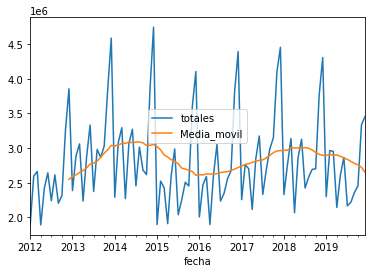

In [69]:
delitos["Media_movil"] = delitos.rolling(window =12).mean() #Nueva columna que se llama Media_movil en donde
#hace un promedio de 12 períodos anteriores 
delitos.plot() #Grafica tanto la serie original como la Media movil de 12 períodos hacía atrás.

<h2>  1.2 Analizando la estacionariedad </h2>

Recordando: ** Prueba de hipótesis de Dickey-Fuller** 

* $H_0:$ No estacionaria
* $H_a:$ Estacionaria

In [80]:
sts.adfuller(delitos["totales"])

(-1.6023289757014105,
 0.48242344732346254,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 2307.012247508592)

Como $p-valor>\alpha $( es decir, $0.4823>0.05$)  **Aceptamos** $H_0$. Concluimos que tenemos una **SERIE NO ESTACIONARIA**

<h2> 1.3 Diferenciación </h2> 


* *.diff()* es para indicar una diferenciación.
* *.dropna()* es para omitir los $NA$ 
* *zero = False* es para omitir $\varphi _0$, ya que recordemos que $corr(x_t,x_t)=1$
* *lags =40* es para decir que se requiere los primeros $40$ períodos.

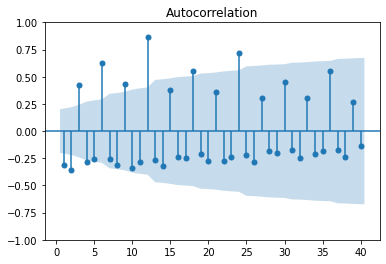

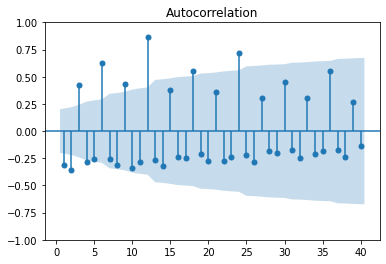

In [83]:
sgt.plot_acf(delitos["totales"].diff().dropna(), zero = False, lags =40) # Hace la gráfica

Como la autocorrelación es positiva para $13$ retrasos, entonces la serie necesita una mayor diferenciación. Comprobando lo anterior con **Dickey-Fuller** tenemos que:

In [84]:
sts.adfuller(delitos["totales"].diff().dropna())

(-2.0369811602741583,
 0.27059714763346576,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 2279.5599519243106)

Como $p-valor>\alpha $, es decir $0.2706>0.05$, entonces la serie con $1$ diferenciación es  **NO estacionaria** .


Aplicando una $2$da diferenciación a la serie, tenemos que:

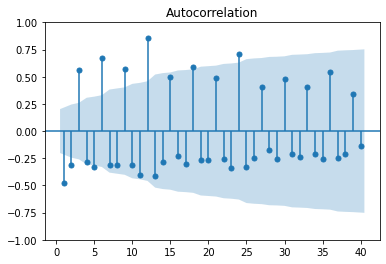

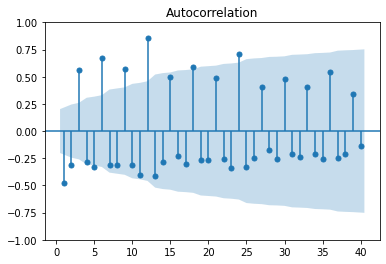

In [86]:
sgt.plot_acf(delitos["totales"].diff().dropna().diff().dropna() , zero = False, lags =40)

Con la $2$da diferenciación a la serie sigo teniendo $13$ retrasos positivas, pero también tengo un $\varphi _1=-0.5$, recordando que **Si la autocorrelación del retraso $1$, en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada**. Dado que cuando aplicamos $1$era diferencia tenemos demasiados retrasos positivos y cuando hacemos $2$da diferencia obtenemos que la serie esta *sobrediferenciada.* Entonces escogeremos la serie diferencia que tenga la menor desviación estándar.

In [92]:
delitos["totales"].diff().dropna().std() #Desviación estándar con 1 diferencia.

822966.7543399608

In [93]:
delitos["totales"].diff().dropna().diff().dropna().std()  #Desviación estándar con 2 diferencias

1338815.6497290526

Tenemos que $822,966.75<1,338,815.65$, así que concluimos que $d=1$ 

In [99]:
d=1

<h3> Gráfica de la serie original y diferenciada </h3>

<AxesSubplot:>

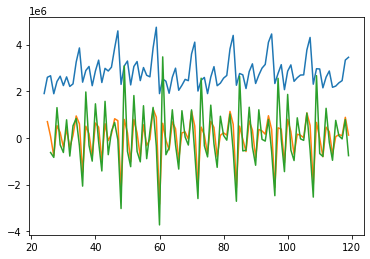

In [118]:
delitos["totales"].plot() # Gráfica en azul
delitos["totales"].diff().dropna().plot()  #Gráfic en naranja
delitos["totales"].diff().dropna().diff().dropna().plot() #Gráfica en verde

<h2> 1.4 Autorregresivos: Función de autocorrelación parcial </h2> 

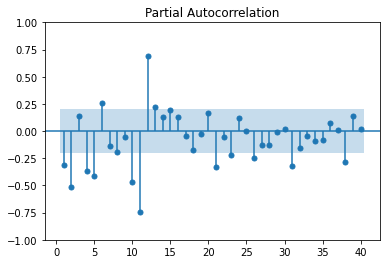

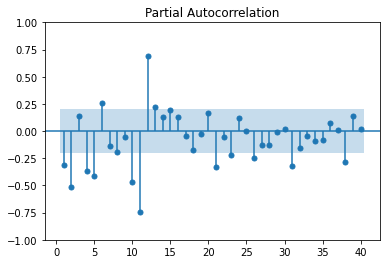

In [94]:
sgt.plot_pacf(delitos["totales"].diff().dropna(), zero= False , lags=40, method = "ols") #Gráfic de autocorrelación parcial

concluimos que $p=12$

In [98]:
p=12

<h2> 1.5 Medias móviles: Función de autocorrelación </h2>


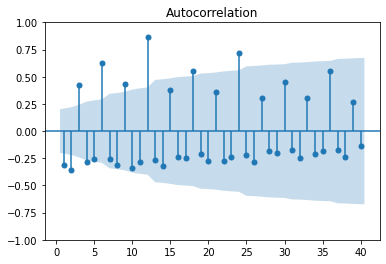

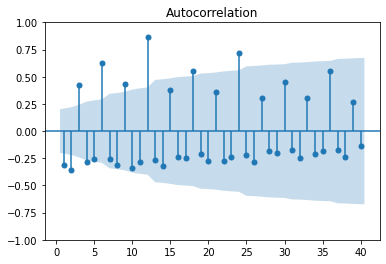

In [96]:
sgt.plot_acf(delitos["totales"].diff().dropna(), zero= False , lags=40) #Gráfica de autocorrelación.

Concluimos que $q=12$

In [97]:
q=12

<h2> 1.6 Modelo ARIMA </h2>

In [121]:
modelo = ARIMA (delitos["totales"],order=(12,1,12)) #Modelo Arima
resultados = modelo.fit() # Ajustar al modelo

C:\Users\81799\anaconda3\anaconda\envs\CD\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\81799\anaconda3\anaconda\envs\CD\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\81799\anaconda3\anaconda\envs\CD\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


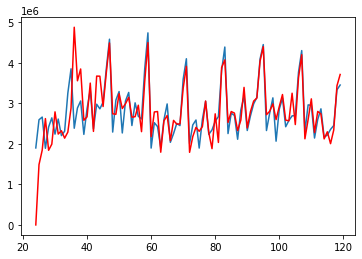

In [120]:
plt.plot(delitos["totales"]) #Gráfica en azul los datos originales.
plt.plot(resultados.fittedvalues, color = "red") #Gráfica del modelo ARIMA(12,1,12) de color rojo

In [122]:
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                totales   No. Observations:                   96
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1442.112
Date:                Sun, 22 May 2022   AIC                           2934.224
Time:                        23:43:39   BIC                           2998.071
Sample:                             0   HQIC                          2960.023
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0301      0.029     -1.041      0.298      -0.087       0.027
ar.L2         -0.0161      0.032     -0.496      0.620      -0.080       0.047
ar.L3         -0.1002      0.034     -2.915      0.0

<h2> 1.7 Análisis de los residuos </h2>

In [127]:
residuals=pd.DataFrame(resultados.resid)#DataFrame con los residuos 
residuals # Imprimir los valores

,0
24,1.900578e+06
25,1.107333e+06
26,8.172742e+05
27,-7.333324e+05
28,5.738230e+05
...,...
115,-8.056607e+04
116,3.521858e+05
117,1.104735e+05
118,-9.928148e+04


<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

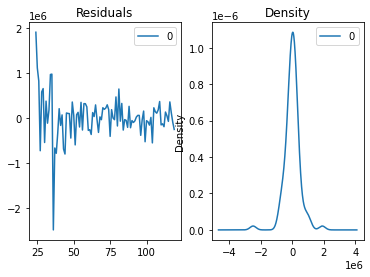

In [129]:
fig, ax=plt.subplots(1,2) #Hacer una fila y dos columnas para las gráficas
residuals.plot(title="Residuals", ax=ax[0]) #En la gráfica 1 se ven los residuos.
residuals.plot(kind="kde",title="Density", ax=ax[1])#En la gráfica 2 se hace un 
#histograma de los residuos para ver si se parece a una distribución normal

<h2>  Predicción con ARIMA (p,d,q) </h
    2>

<AxesSubplot:>

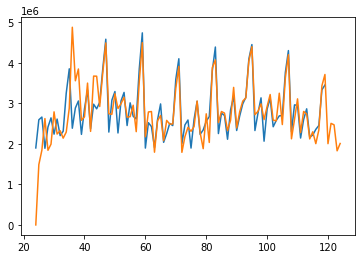

In [138]:
delitos["totales"].plot() #Gráfica en azul son los datos originales
resultados.predict(0,100).plot() 
#Gráfica en naranja son los datos con el modelo ARIM(12,1,12) y
#la predicción de los siguientes 5 meses.
